# Random Forest on Iris dataset

###### The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# peview of the data
data = pd.read_csv("iris.csv")
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [3]:
# let's print the head of the data.
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


#### There are no null values, so we don't have to worry about that

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [5]:
print(data["species"].value_counts())

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64


##### Data Visualization
##### After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in blue) is distinctly different from those of the other two species. There is some overlap in the pairwise relationships of the other two species, iris-versicolor (orange) and iris-virginica (green).

C:\Users\Kuldeep Jaimini\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


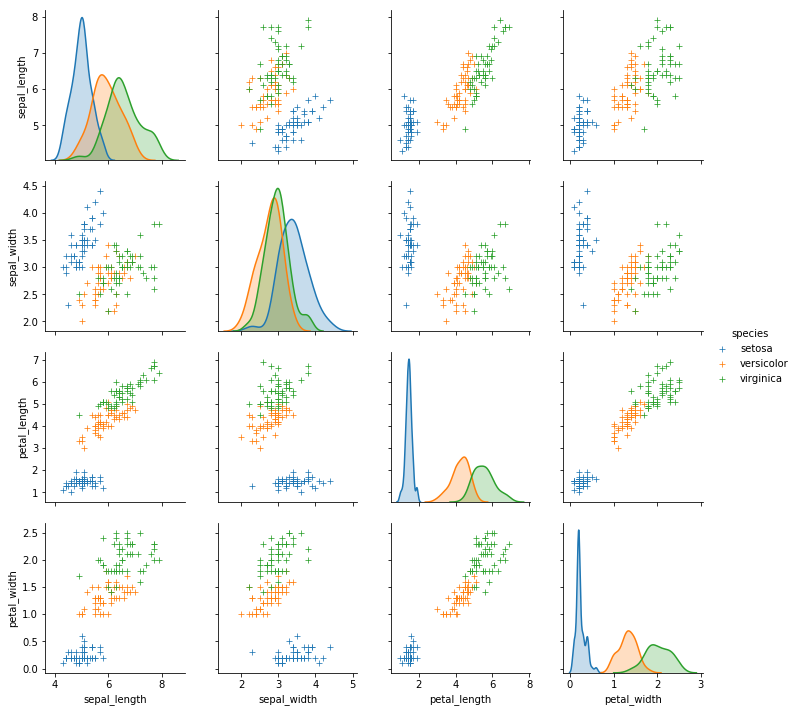

In [6]:
graph = sns.pairplot(data, hue = "species" , markers='+')
plt.show()

#### Write a function to load the dataset from the csv file and split the dataset into train and test set(X_train, Y_train, X_test, Y_test)

In [7]:
# load dataset
def load_dataset(csv_name = "iris.csv", train_test_split = 2/3):
    dataset = pd.read_csv(csv_name)
    dataset_shuffle=dataset.iloc[np.random.permutation(len(dataset))]
    dataset=dataset_shuffle.reset_index(drop=True)
    X, Y = dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values, dataset[["species"]].values
    num_train = int(len(X)*train_test_split)
    X_train, Y_train = X[:num_train], Y[:num_train]
    X_test, Y_test = X[num_train:], Y[num_train:]
    return X_train, Y_train, X_test, Y_test

# split the dataset in train and test
train_test_split = 2/3   
X_train, Y_train, X_test, Y_test = load_dataset(csv_name = "iris.csv", train_test_split = train_test_split)

print("X_train shape:{}\nY_train shape:{}\nX_test shape:{}\nY_test shape:{}".format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

X_train shape:(100, 4)
Y_train shape:(100, 1)
X_test shape:(50, 4)
Y_test shape:(50, 1)


#### Call the random forest classifier from the SKlearn library

In [8]:
# model
clf = RandomForestClassifier(n_estimators=4, max_depth=2, random_state=0)
clf = clf.fit(X_train, Y_train)

C:\Users\Kuldeep Jaimini\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


#### Print the feature importance, Confusion matrix, Classification report.
###### A confusion matrix is a table,  which is oftenly used to describe the performance of the classifier on the test data, when true labels are given for the test data. 

In [9]:
print("features importance:", clf.feature_importances_)
Y_pred = clf.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, Y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(Y_test, Y_pred))

features importance: [0.32894219 0.02209634 0.23006022 0.41890125]
=== Confusion Matrix ===
[[14  0  0]
 [ 0 17  2]
 [ 0  0 17]]


=== Classification Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.89      0.94        19
   virginica       0.89      1.00      0.94        17

   micro avg       0.96      0.96      0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



#### Calculate the accuracy of the model.

In [10]:
# calculate Accuracy
accuracy = np.zeros((len(Y_test),1))
for i in range(len(Y_pred)):
    if Y_pred[i] == Y_test[i]:
        accuracy[i] = 1
Accuracy = (np.sum(accuracy)/len(accuracy)*100)  
print("Accuracy:" ,Accuracy)

Accuracy: 96.0
